In [1]:
import numpy as np
import pandas as pd


In [6]:
df = pd.read_csv("Stress.csv")
df.head

<bound method NDFrame.head of              subreddit post_id sentence_range  \
0                 ptsd  8601tu       (15, 20)   
1           assistance  8lbrx9         (0, 5)   
2                 ptsd  9ch1zh       (15, 20)   
3        relationships  7rorpp        [5, 10]   
4     survivorsofabuse  9p2gbc         [0, 5]   
...                ...     ...            ...   
2833     relationships  7oee1t       [35, 40]   
2834              ptsd  9p4ung       [20, 25]   
2835           anxiety  9nam6l        (5, 10)   
2836    almosthomeless  5y53ya        [5, 10]   
2837              ptsd  5y25cl         [0, 5]   

                                                   text  label  confidence  \
0     He said he had not felt that way before, sugge...      1    0.800000   
1     Hey there r/assistance, Not sure if this is th...      0    1.000000   
2     My mom then hit me with the newspaper and it s...      1    0.800000   
3     until i met my new boyfriend, he is amazing, h...      1    0.6

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2838 entries, 0 to 2837
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   subreddit         2838 non-null   object 
 1   post_id           2838 non-null   object 
 2   sentence_range    2838 non-null   object 
 3   text              2838 non-null   object 
 4   label             2838 non-null   int64  
 5   confidence        2838 non-null   float64
 6   social_timestamp  2838 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 155.3+ KB


In [8]:
df.isnull().sum()

subreddit           0
post_id             0
sentence_range      0
text                0
label               0
confidence          0
social_timestamp    0
dtype: int64

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<AxesSubplot:xlabel='label', ylabel='count'>

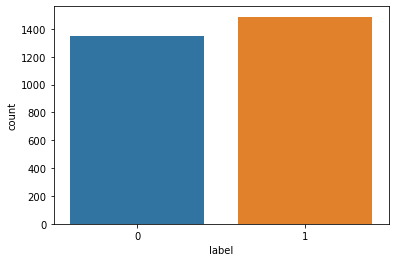

In [14]:
sns.countplot(x=df["label"])

In [16]:
df.shape

(2838, 7)

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix

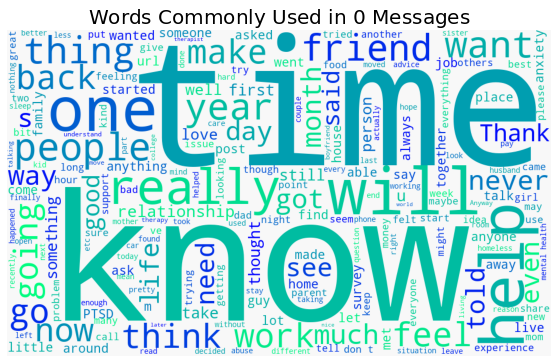

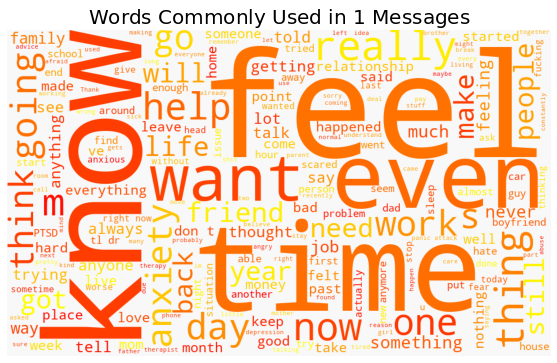

In [24]:
from wordcloud import WordCloud
for label, cmap in zip([0,1],
                       ['winter', 'autumn', 'magma', 'viridis', 'plasma']):
    text =df.query('label == @label')['text'].str.cat(sep=' ')
    plt.figure(figsize=(10, 6))
    wc = WordCloud(width=1000, height=600, background_color="#f8f8f8", colormap=cmap)
    wc.generate_from_text(text)
    plt.imshow(wc)
    plt.axis("off")
    plt.title(f"Words Commonly Used in ${label}$ Messages", size=20)
    plt.show()

In [31]:
df["new_label"]= df["label"].map({0: "No stress", 1: "Stress"})

dataset= df[["text", "label"]]
datas = df[["text", "new_label"]]

In [32]:
dataset

,text,label
0,"He said he had not felt that way before, sugge...",1
1,"Hey there r/assistance, Not sure if this is th...",0
2,My mom then hit me with the newspaper and it s...,1
3,"until i met my new boyfriend, he is amazing, h...",1
4,October is Domestic Violence Awareness Month a...,1
...,...,...
2833,"* Her, a week ago: Precious, how are you? (I i...",0
2834,I don't have the ability to cope with it anymo...,1
2835,In case this is the first time you're reading ...,0
2836,Do you find this normal? They have a good rela...,0


In [52]:
from sklearn.model_selection import train_test_split

X_train , X_test, y_train, y_test = train_test_split(datas["text"], datas["new_label"],
                                                      test_size=0.2)

In [53]:
print(X_test.shape , y_train.shape , X_train.shape, y_test.shape)

(568,) (2270,) (2270,) (568,)


In [54]:
clf = Pipeline([
    ('vect', CountVectorizer(stop_words = "english")),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB()),
])    

In [55]:
model = clf.fit(X_train , y_train)

In [56]:
print("Accuracy is :" , model.score(X_train, y_train))

Accuracy is : 0.8806167400881058


In [57]:
print("Accuracy is :", model.score(X_test, y_test))

Accuracy is : 0.7165492957746479


In [59]:
X_train, X_test, y_train, y_test = train_test_split(dataset["text"],
                                                   dataset["label"],
                                                   test_size=0.2)
from sklearn.naive_bayes import BernoulliNB

clf1 = Pipeline([
    ('vect', CountVectorizer(stop_words="english")),
    ('tfidf', TfidfTransformer()),
    ('classifier', BernoulliNB())
])

model1 = clf1.fit(X_train, y_train)

In [61]:
print("Accuracy is :", model1.score(X_train, y_train))

Accuracy is : 0.9427312775330396


In [62]:
print("Accuracy Score :", model1.score(X_test, y_test))

Accuracy Score : 0.7130281690140845
